# Exploratory Data Analysis of AIS data from Denmark

Morten Dam Joergensen, <mdj@mdj.dk>

The goal of this project is to identify a series of features where operational anomalies can be detected. 
These features should all a coast guard to detect abnormal behavior in the waters. 

In [79]:
import pandas as pd
import zipfile

import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 15)

import datetime
def dateparse (datetimestr):    
    return datetime.datetime.strptime(datetimestr, '%d/%m/%Y %H:%M:%S')



## Single file analsis

In [92]:
df = pd.read_csv("/home/mdj/Datasets/ais/aisdk_20180601.csv", parse_dates=[0], date_parser=dateparse, nrows=20000)

In [93]:
# 220012000 abnormal?

ship = df.loc[df['MMSI'] == 636014902]
ship['Coordinates'] = list(zip(ship.Longitude, ship.Latitude))
ship['Coordinates'] = ship['Coordinates'].apply(Point)

/home/mdj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/mdj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


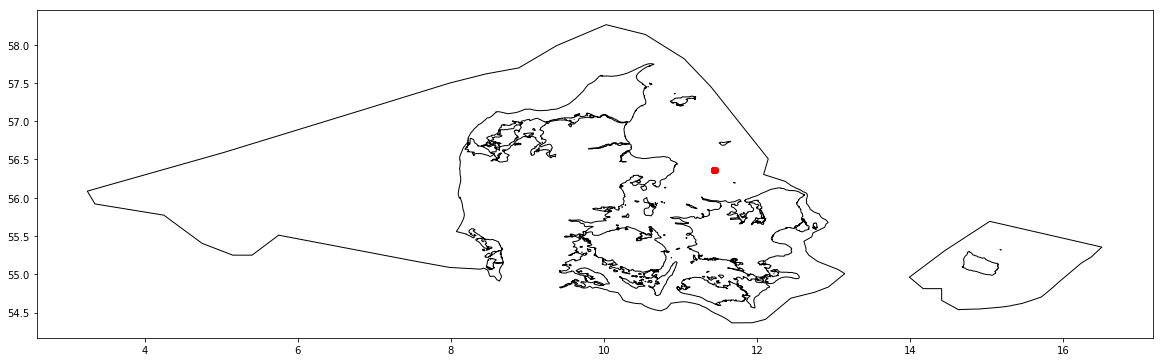

In [94]:
gdf = gpd.GeoDataFrame(ship, geometry='Coordinates')
world = gpd.read_file("../regions/eez_dk_full.geojson")#gpd.datasets.get_path('naturalearth_lowres'))


ax = world.plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red')

plt.show()


In [103]:
cargo_ships = df[df['Ship type'] == 'Cargo']
cargo_ships.head()

,# Timestamp,Type of mobile,MMSI,Latitude,Longitude,Navigational status,ROT,SOG,COG,Heading,...,Name,Ship type,Cargo type,Width,Length,Type of position fixing device,Draught,Destination,ETA,Data source type
39,2018-06-01 00:00:00,Class A,250515000,91.00000,181.000000,Unknown value,NaN,NaN,NaN,NaN,...,ARKLOW ROVER,Cargo,NaN,13.0,90.0,GPS,6.3,VEJLE,01/06/2018 10:00:00,AIS
101,2018-06-01 00:00:00,Class A,356864000,91.00000,181.000000,Unknown value,NaN,NaN,NaN,NaN,...,MSC ROSSELLA,Cargo,NaN,32.0,243.0,GPS,8.6,LTKLJ,02/06/2018 03:00:00,AIS
286,2018-06-01 00:00:01,Class A,275464000,91.00000,181.000000,Unknown value,NaN,NaN,NaN,NaN,...,RIX RIVER,Cargo,NaN,13.0,88.0,GPS,5.4,BRUNSBUTTEL,02/06/2018 14:00:00,AIS
302,2018-06-01 00:00:01,Class A,230351000,57.71992,10.361320,Under way using engine,0.0,15.4,68.9,69.0,...,HJORDIS,Cargo,Category OS,18.0,120.0,GPS,7.1,FITOR,04/06/2018 01:00:00,AIS
516,2018-06-01 00:00:03,Class A,231123000,57.74249,9.856687,Under way using engine,-1.1,17.4,79.8,80.0,...,SELFOSS,Cargo,NaN,21.0,130.0,GPS,6.4,ARHUS,01/06/2018 08:00:00,AIS


In [171]:
import pyproj
_GEOD = pyproj.Geod(ellps='WGS84')

    
cargo_ships['Longitude']

def dist(a,b,c,d):
    print (a,b,c,d)
    return 1


In [174]:
# cargo_ships['# Timestamp'] - cargo_ships['# Timestamp'].shift()
cargo_ships['# Timestamp'].shift().where(cargo_ships['MMSI'].shift() == cargo_ships['MMSI'], '')
# aship = cargo_ships.loc[cargo_ships['MMSI'] == 250515000]
# aship['dt'] = aship['# Timestamp'] - aship['# Timestamp'].shift()

# aship.apply(lambda row: dist(row['Longitude'], row['Latitude'], row.shift()['Longitude'], row.shift()['Latitude']), axis=1)


39                          
101                         
286                         
302                         
516                         
607                         
659                         
665                         
692                         
700                         
786                         
889                         
982                         
1039                        
1069                        
1103                        
1109                        
1127                        
1163                        
1258                        
1279                        
1318                        
1402                        
1545                        
1635                        
1755                        
1792                        
1885     2018-06-01 00:00:12
1990                        
1992                        
                ...         
19543                       
19563                       
19571                       
19574         

## Full analysis

In [10]:
datasets = {
    "2018" : [
            "/home/mdj/Datasets/ais/dk_csv_jan2018.zip"
    ]
}

In [11]:
for dataset in datasets['2018']:
    zf = zipfile.ZipFile(dataset)
    for zfi in zf.filelist:
#         df = pd.read_csv(zf.open(zfi.filename))
        pass